# Яременко Вікторія Лабораторна 3

Завдання 1.
1.	Розробити звичайний автокодувальник  для датасету рукописних цифр MNIST на основі багатошарової нейронної мережі.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 128)               4224      
                                                                 
 dense_7 (Dense)             (None, 784)               101136    
                                                                 
Total params: 209968 (820.19 KB)
Trainable params: 209968 (820.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
235/235 

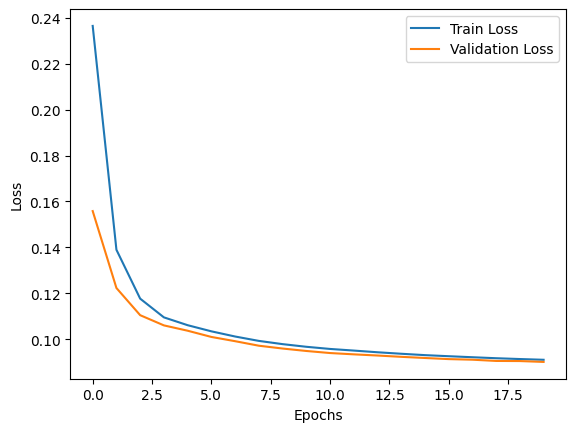

313/313 [==============================] - 1s 2ms/step


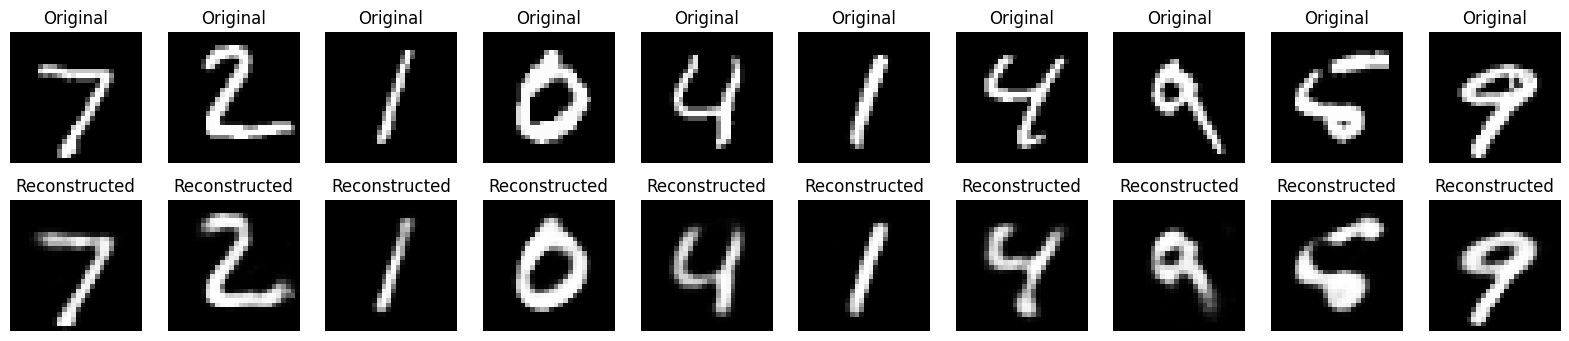

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Завантаження датасету MNIST
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Переведення зображень у вектори (приведення до одномірної форми)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Функція для створення моделі
def build_autoencoder(input_dim, encoding_dim):
    input_img = tf.keras.layers.Input(shape=(input_dim,))

    # Encoder
    encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
    encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoded)

    # Decoder
    decoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
    decoded = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoded)

    # Combine Encoder and Decoder layers
    autoencoder = tf.keras.models.Model(input_img, decoded)

    return autoencoder

# Задаємо розмірність вхідних та закодованих зображень
input_dim = x_train.shape[1]
encoding_dim = 32  # Кількість нейронів у прихованому шарі

# Побудова моделі
autoencoder = build_autoencoder(input_dim, encoding_dim)
autoencoder.summary()

# Компіляція моделі
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Навчання моделі
history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Візуалізація функції втрат
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Результати реконструкції
decoded_imgs = autoencoder.predict(x_test)

# Відображення оригінальних та відтворених зображень
n = 10  # Кількість зображень для відображення
plt.figure(figsize=(20, 4))
for i in range(n):
    # Оригінальне зображення
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Відтворене зображення
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')
plt.show()


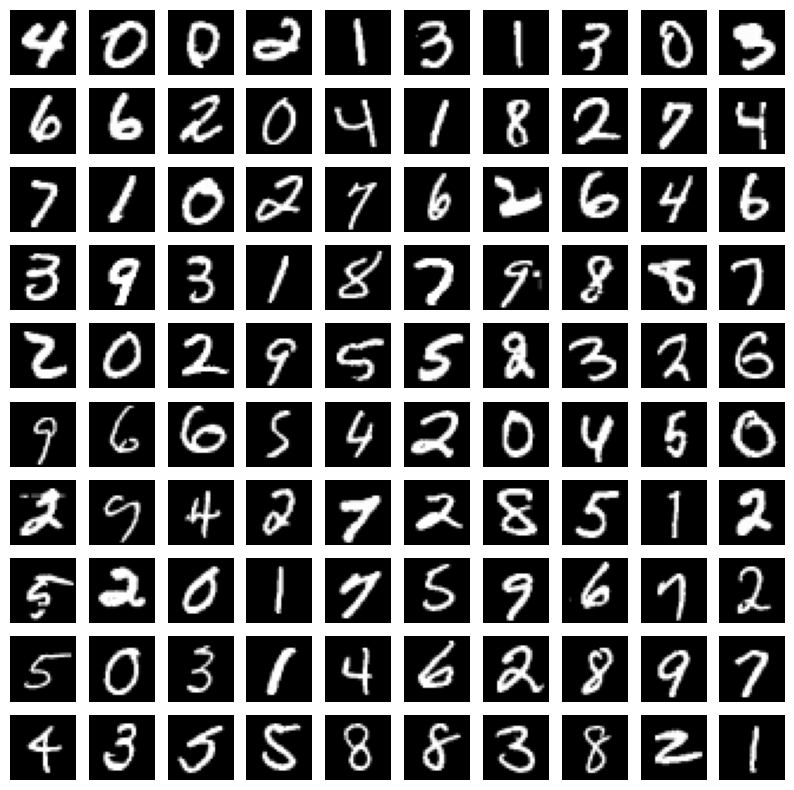

In [2]:
(x_train, _), (_, _) = mnist.load_data()

# Вибір 100 випадкових зображень
indices = np.random.randint(0, x_train.shape[0], 100)
images = x_train[indices]

# Виведення випадкових зображень
plt.figure(figsize=(10, 10))
for i in range(len(indices)):
    plt.subplot(10, 10, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.show()


Висновок: Для першого завдання я розробила звичайний автокодувальник для датасету рукописних цифр MNIST на основі багатошарової нейронної мережі. Я використала модель, яка складається з вхідного шару, двох прихованих шарів (енкодер і декодер) та вихідного шару.

 Після навчання моделі я відобразила графік функції втрат для тренувального та валідаційного наборів даних. Видно, що функція втрат зменшується з кожною епохою, що свідчить про успішність навчання моделі.

 Також я відтворила оригінальні та відтворені зображення для оцінки якості автокодування. Ці зображення показують, що автокодувальник успішно відтворює рукописні цифри з високою точністю.